**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



In [2]:
txt_fdiry = file.path(
    FD_RES, 
    "region_annotation", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "result.summary.fcc_peak_call.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_annot_fcc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 225161      8


Chrom,ChromStart,ChromEnd,Region,Group,Label,Label2,Label3
chr1,10038,10405,chr1:10038-10405,ASTARR,ASTARR_R,ASTARR_R,Repress (R)
chr1,16025,16338,chr1:16025-16338,ASTARR,ASTARR_R,ASTARR_R,Repress (R)
chr1,17288,17689,chr1:17288-17689,ASTARR,ASTARR_R,ASTARR_R,Repress (R)


In [6]:
txt_fdiry = file.path(
    FD_RES, 
    "region_nuc", 
    "fcc_astarr_macs"
)
txt_fname = "K562.hg38.ASTARR.macs.KS91.input.rep_all.max_overlaps.q5.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_gc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 150042     12


#1_usercol,2_usercol,3_usercol,4_pct_at,5_pct_gc,6_num_A,7_num_C,8_num_G,9_num_T,10_num_N,11_num_oth,12_seq_len
chr1,10038,10405,0.476839,0.523161,122,192,0,53,0,0,367
chr1,14282,14614,0.421687,0.578313,65,102,90,75,0,0,332
chr1,16025,16338,0.412141,0.587859,62,89,95,67,0,0,313


In [4]:
txt_fdiry = file.path(
    FD_RES, 
    "region_coverage_fcc", 
    "fcc_astarr_macs_input_overlap",
    "summary"
)
txt_fname = "result.coverage.zscore.final.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

dat = read_tsv(txt_fpath, show_col_types = FALSE)

dat_region_score_fcc = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 432505      9


Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr10,100729094,100729750,chr10:100729094-100729750,-0.3065107,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100743501,100744571,chr10:100743501-100744571,-0.2702473,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr10,100745413,100745741,chr10:100745413-100745741,0.1130381,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [10]:
tmp = dat_region_gc
tmp = tmp %>% dplyr::select(
    `#1_usercol`,
    `2_usercol`,
    `3_usercol`,
    `5_pct_gc`,
    `12_seq_len`
)
colnames(tmp) = c("Chrom", "ChromStart", "ChromEnd", "pGC", "Length")

dat = dat_region_annot_fcc
dat = dat %>% dplyr::left_join(tmp, by = c("Chrom", "ChromStart", "ChromEnd"))
head(dat)

Chrom,ChromStart,ChromEnd,Region,Group,Label,Label2,Label3,pGC,Length
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
chr1,10038,10405,chr1:10038-10405,ASTARR,ASTARR_R,ASTARR_R,Repress (R),0.523161,367
chr1,16025,16338,chr1:16025-16338,ASTARR,ASTARR_R,ASTARR_R,Repress (R),0.587859,313
chr1,17288,17689,chr1:17288-17689,ASTARR,ASTARR_R,ASTARR_R,Repress (R),0.625935,401
chr1,28934,29499,chr1:28934-29499,ASTARR,ASTARR_R,ASTARR_R,Repress (R),0.771681,565
chr1,115429,115969,chr1:115429-115969,ASTARR,ASTARR_A,ASTARR_A,Active (A),0.381481,540
chr1,136201,137353,chr1:136201-137353,ASTARR,ASTARR_R,ASTARR_R,Repress (R),0.694444,1152


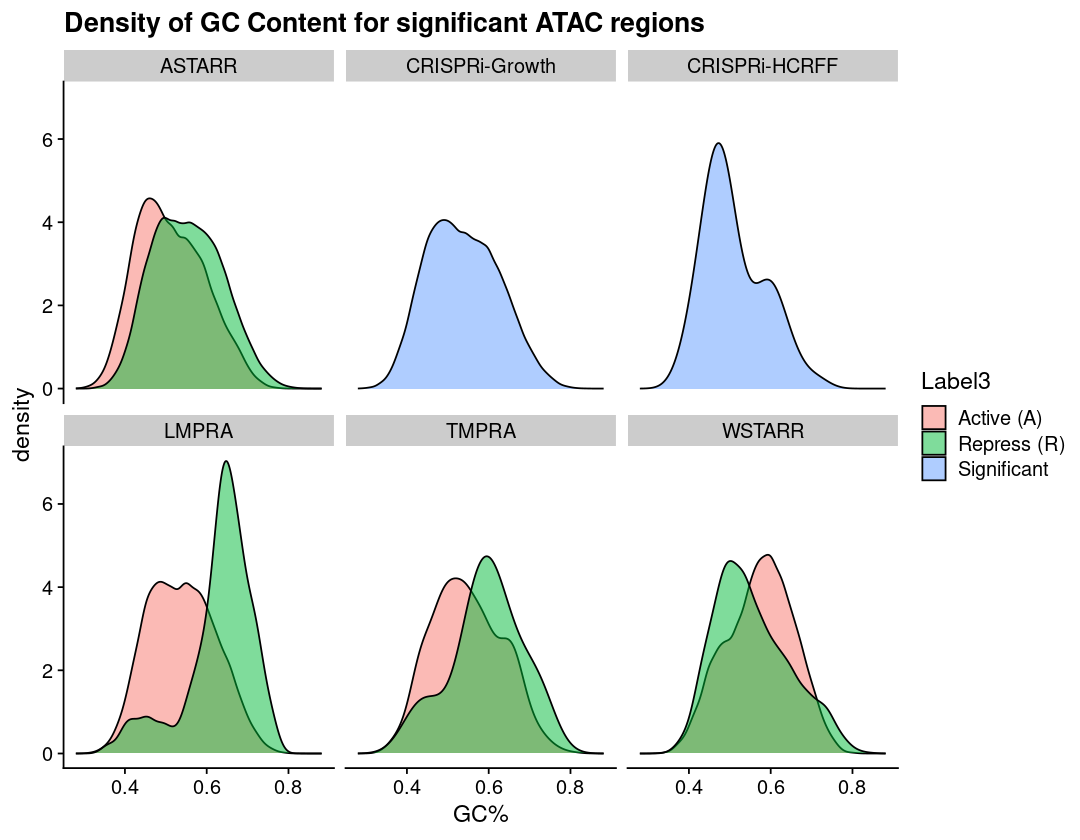

In [19]:
gpt = ggplot(dat, aes(x=pGC, fill=Label3)) + 
    geom_density(alpha=0.5) + 
    labs(x = "GC%", title = "Density of GC Content for significant ATAC regions") +
    theme_cowplot() +
    facet_wrap(~Group)

options(repr.plot.height = 7, repr.plot.width=9)
print(gpt)